In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib .pyplot as plt

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
df = pd.read_csv("water_potability.csv")
df.head()
#OutcomeVariable - Potability
#Potability = 1 (Safe) Potability = 0 (Unsafe)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [30]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [31]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [33]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

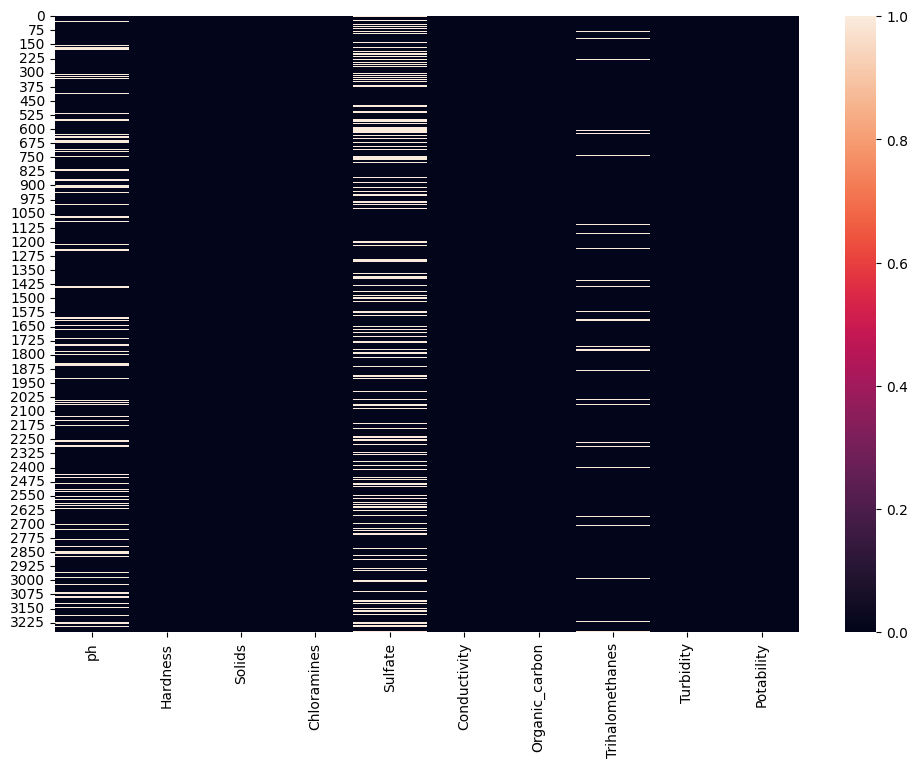

In [34]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())

<Axes: >

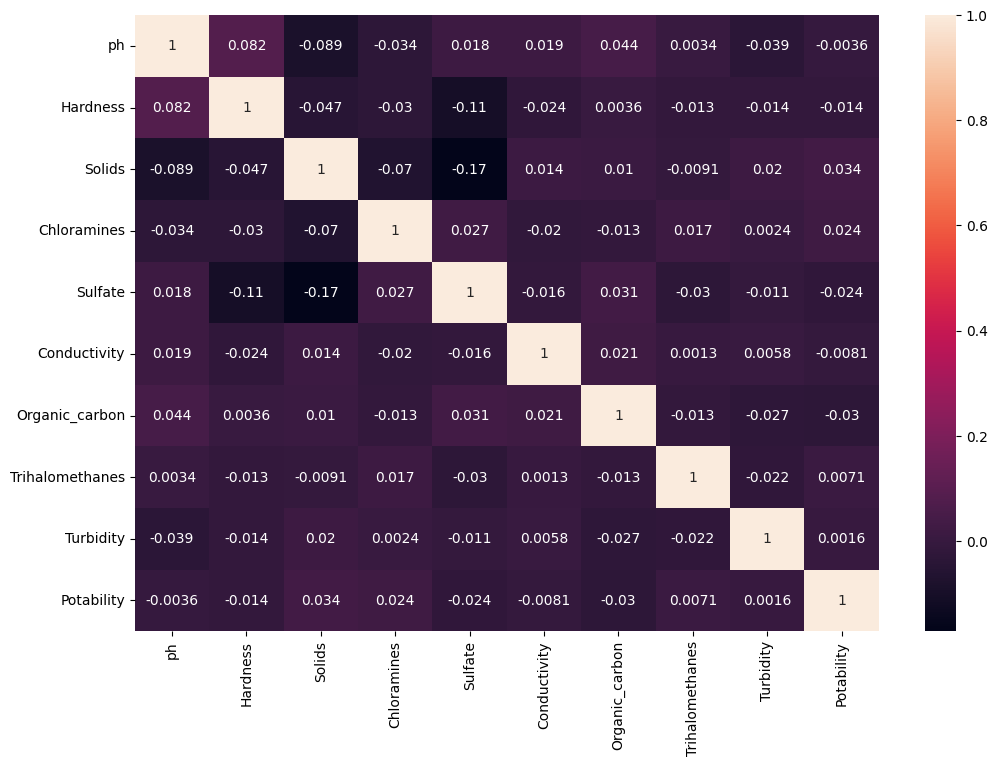

In [35]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='Potability', ylabel='count'>

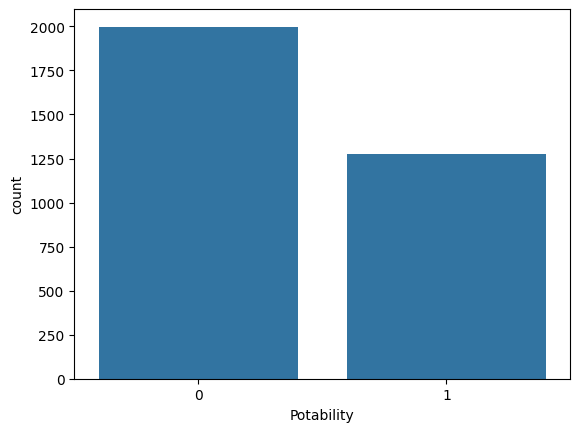

In [36]:
sns.countplot(x="Potability",data = df)

In [37]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

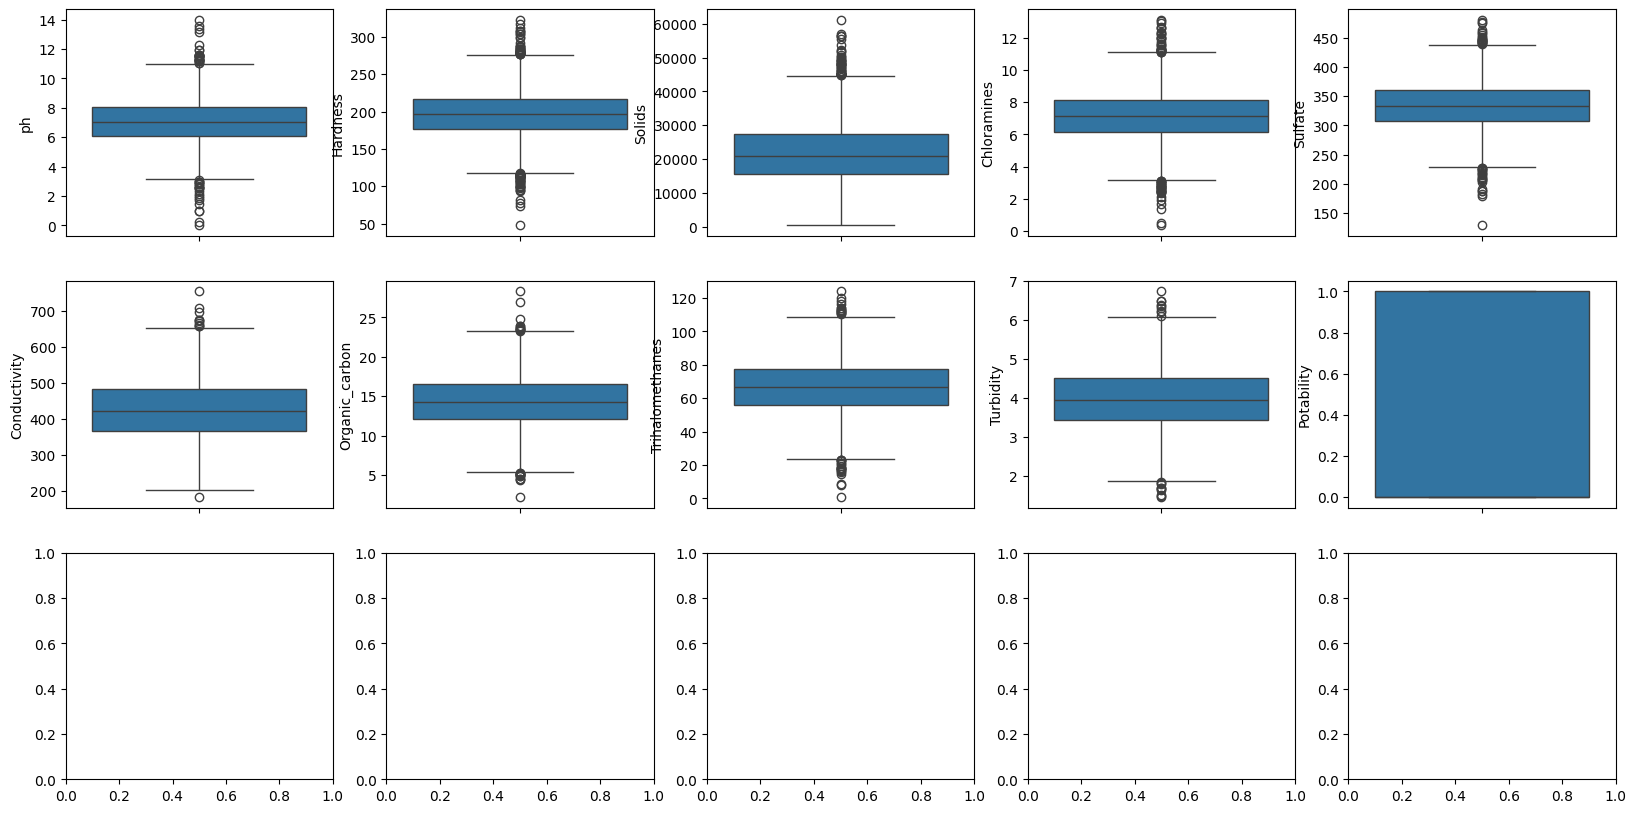

In [38]:
fig, ax = plt.subplots(ncols = 5, nrows = 3, figsize = (20,10))
ax = ax.flatten()
index = 0
for col, values in df.items():
  sns.boxplot(y = col, data = df, ax = ax[index])
  index += 1

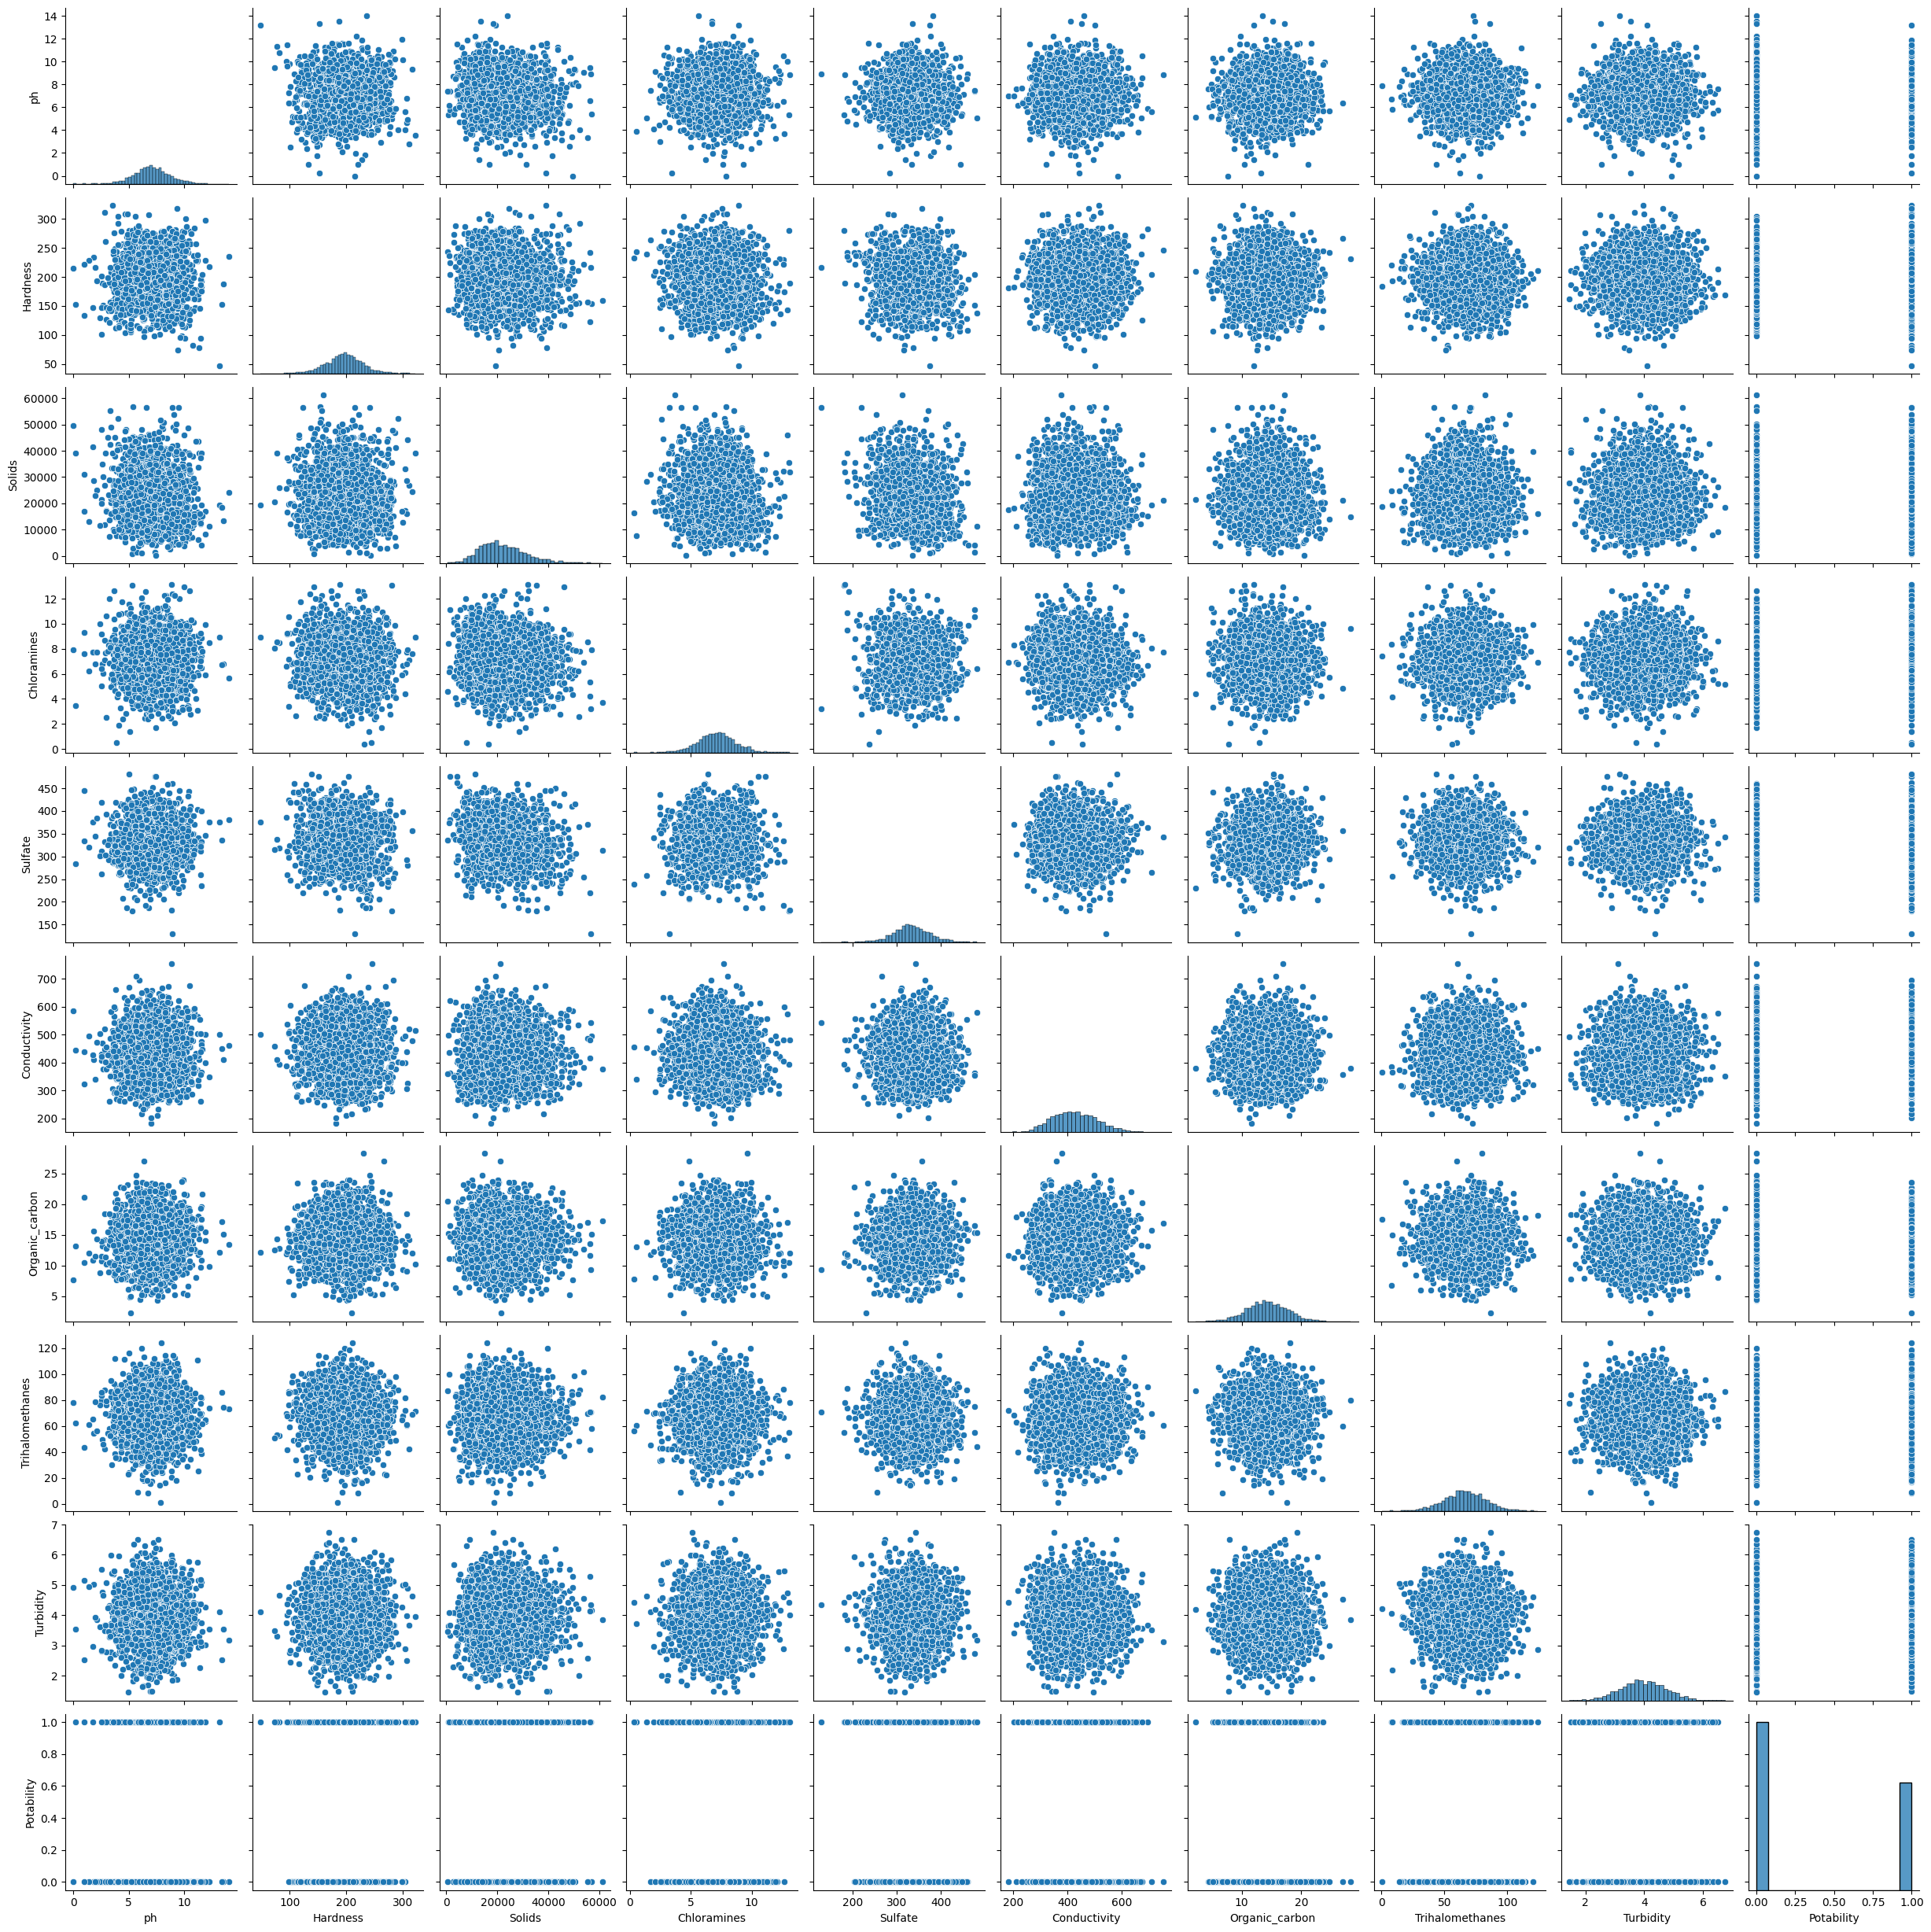

In [39]:
sns.pairplot(df)

In [40]:
fig = px.pie(df, names = 'Potability', hole = 0.4)
fig.show()

In [41]:
fig = px.scatter(df, x = 'ph', y = 'Hardness', color = 'Potability')
fig.show()


Text(0.5, 1.0, 'Missing Values Percentages')

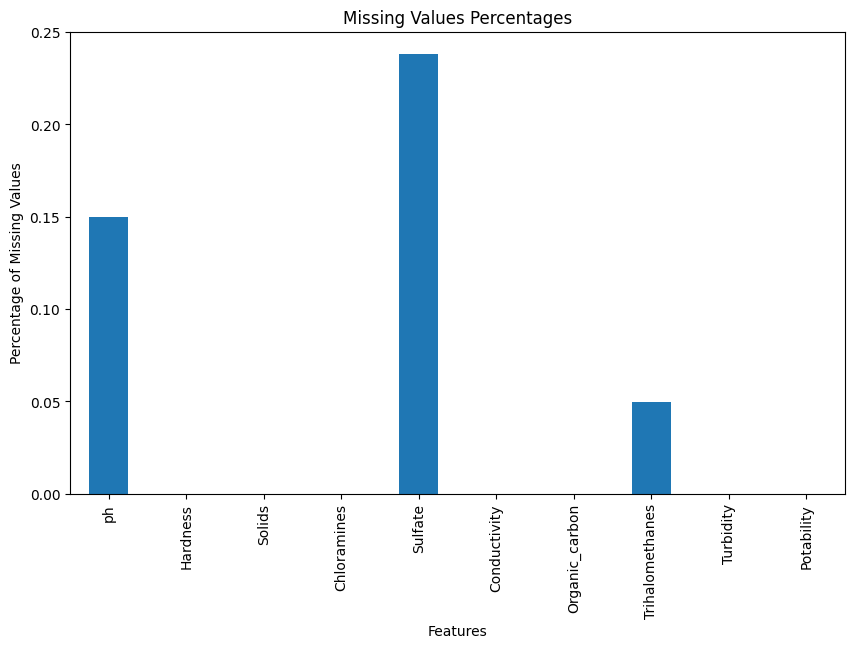

In [42]:
df.isnull().mean().plot.bar(figsize = (10,6))
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Percentages")

In [43]:
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

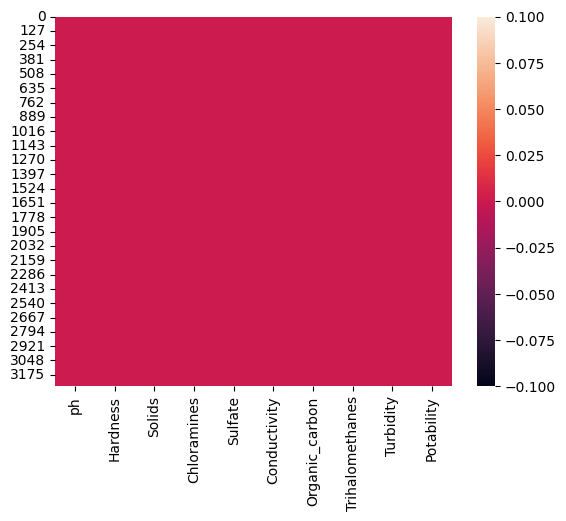

In [44]:
sns.heatmap(df.isnull())

In [45]:
x = df.drop("Potability", axis = 1)
y = df["Potability"]
x.shape, y.shape

((3276, 9), (3276,))

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

In [50]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#object of LR
model_lr = LogisticRegression()
#Training Model
model_lr.fit(x_train, y_train)
#Making Prediction
pred_lr = model_lr.predict(x_test)
#Accuracy Score
accuracy_score_lg = accuracy_score(y_test, pred_lr)
print("Accuracy Score of Logistic Regression is: ", accuracy_score_lg)

Accuracy Score of Logistic Regression is:  0.6280487804878049


In [51]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
#Object of DT
model_dt = DecisionTreeClassifier(max_depth = 4)
#Training Model
model_dt.fit(x_train, y_train)
#Making Prediction
pred_dt = model_dt.predict(x_test)
#Accuracy Score
accuracy_score_dt = accuracy_score(y_test, pred_dt)
print("Accuracy Score of Decision Tree Classifier is: ", accuracy_score_dt)

Accuracy Score of Decision Tree Classifier is:  0.6341463414634146


In [53]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Object of RF
model_rf = RandomForestClassifier(n_estimators = 100, max_depth = 4)
#Training Model
model_rf.fit(x_train, y_train)
#Making Prediction
pred_rf = model_rf.predict(x_test)
#Accuracy Score
accuracy_score_rf = accuracy_score(y_test, pred_rf)
print("Accuracy Score of Random Forest Classifier is: ", accuracy_score_rf)

Accuracy Score of Random Forest Classifier is:  0.6509146341463414


In [58]:
#kNN-K-Neighbours
from sklearn.neighbors import KNeighborsClassifier
#Object of KNN
model_knn = KNeighborsClassifier(n_neighbors = 15)
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, pred_knn)
print(accuracy_score_knn)

0.5899390243902439


In [64]:
#SVM
from sklearn.svm import SVC
#Object of SVM
model_svm = SVC()
model_svm.fit(x_train, y_train)
pred_svm = model_svm.predict(x_test)
accuracy_score_svm = accuracy_score(y_test, pred_svm)
print(accuracy_score_svm)

0.6280487804878049


In [65]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
#Object of AdaBoost
model_ada = AdaBoostClassifier(n_estimators = 100)
model_ada.fit(x_train, y_train)
pred_ada = model_ada.predict(x_test)
accuracy_score_ada = accuracy_score(y_test, pred_ada)
print(accuracy_score_ada)

0.6189024390243902


In [73]:
#XGBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier
#Object of XGBoost
model_xgb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.03)
model_xgb.fit(x_train, y_train)
pred_xgb = model_xgb.predict(x_test)
accuracy_score_xgb = accuracy_score(y_test, pred_xgb)
print(accuracy_score_xgb)

0.6600609756097561


In [77]:
models = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN", "SVM", "AdaBoost", "XGBoost"],"Accuracy Score": [accuracy_score_lg, accuracy_score_dt, accuracy_score_rf, accuracy_score_knn, accuracy_score_svm, accuracy_score_ada, accuracy_score_xgb]
})
models.sort_values(by = "Accuracy Score", ascending = False)

Model  Accuracy Score
6                   XGBoost        0.660061
2  Random Forest Classifier        0.650915
1  Decision Tree Classifier        0.634146
0       Logistic Regression        0.628049
4                       SVM        0.628049
5                  AdaBoost        0.618902
3                       KNN        0.589939

from matplotlib import pyplot as plt
_df_0['Accuracy Score'].plot(kind='hist', bins=20, title='Accuracy Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Accuracy Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Model  Accuracy Score
6                   XGBoost        0.660061
2  Random Forest Classifier        0.650915
1  Decision Tree Classifier        0.634146
0       Logistic Regression        0.628049
4                       SVM        0.628049
5                  AdaBoost        0.618902
3                       KNN        0.589939

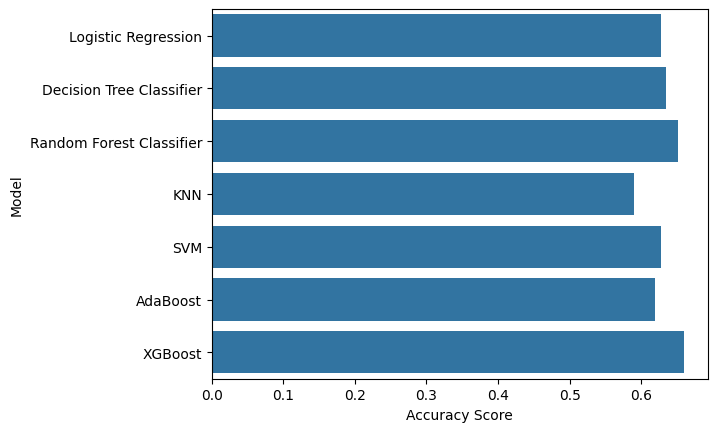

In [79]:
sns.barplot(x = "Accuracy Score", y = "Model", data = models)
models.sort_values(by = "Accuracy Score", ascending = False)

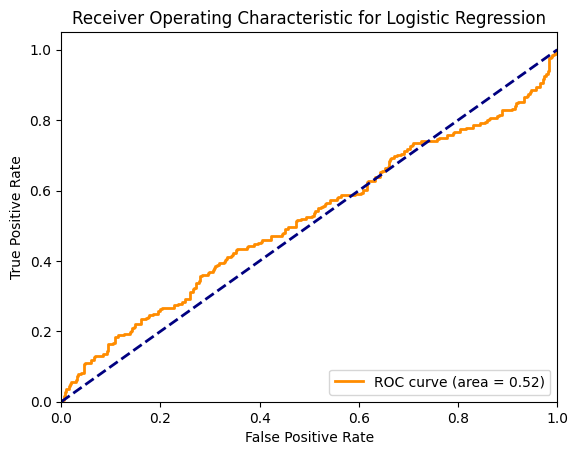

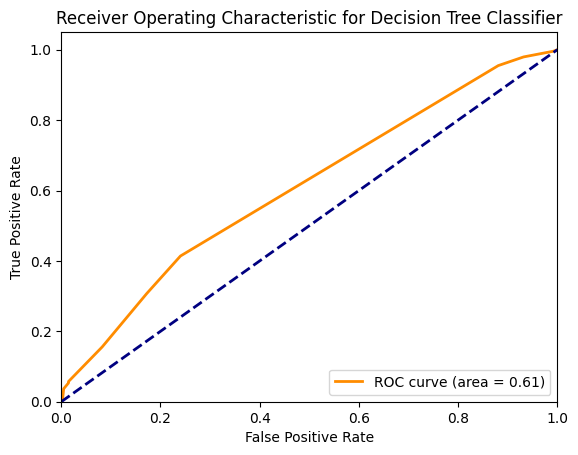

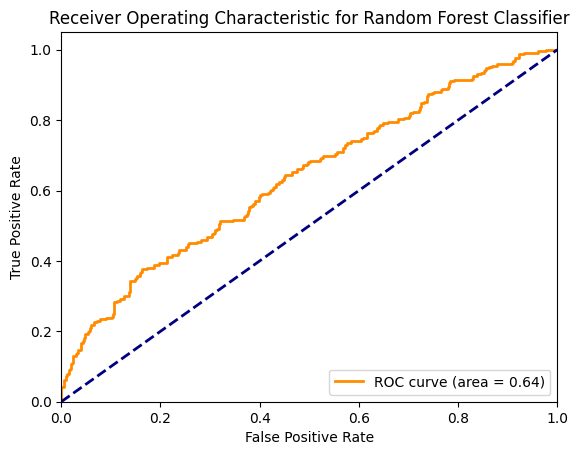

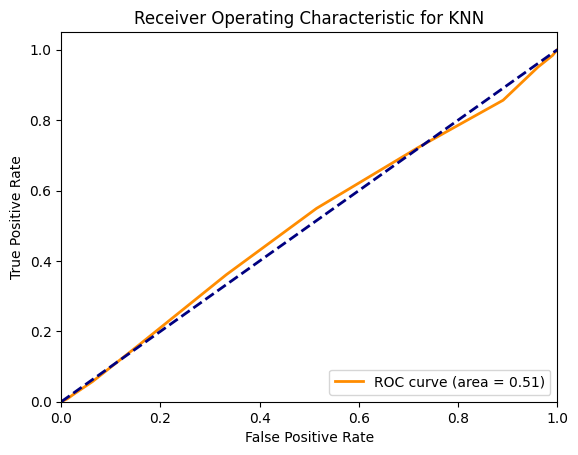

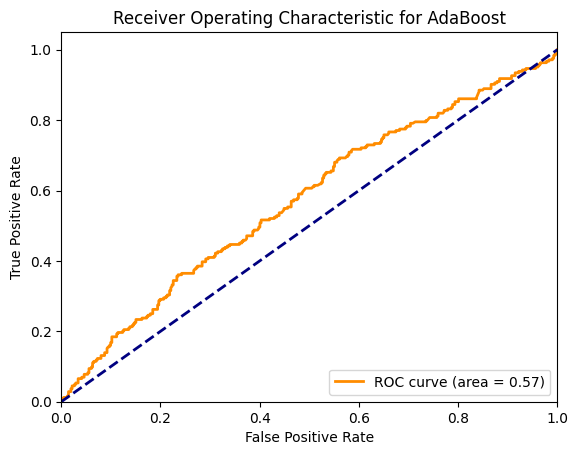

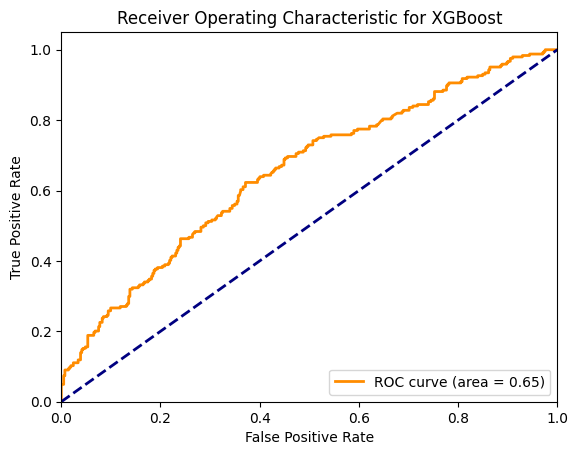

In [80]:
# prompt: generate performance evaluation graph for each model

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve and calculate AUC for each model
def plot_roc_curve(y_test, y_pred_prob, model_name):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic for ' + model_name)
  plt.legend(loc="lower right")
  plt.show()

# Generate ROC curves and AUC for each model
plot_roc_curve(y_test, model_lr.predict_proba(x_test)[:, 1], "Logistic Regression")
plot_roc_curve(y_test, model_dt.predict_proba(x_test)[:, 1], "Decision Tree Classifier")
plot_roc_curve(y_test, model_rf.predict_proba(x_test)[:, 1], "Random Forest Classifier")
plot_roc_curve(y_test, model_knn.predict_proba(x_test)[:, 1], "KNN")
plot_roc_curve(y_test, model_svm.decision_function(x_test), "SVM")  # SVM uses decision_function for ROC
plot_roc_curve(y_test, model_ada.predict_proba(x_test)[:, 1], "AdaBoost")
plot_roc_curve(y_test, model_xgb.predict_proba(x_test)[:, 1], "XGBoost")


# You can also plot other metrics like precision-recall curves, confusion matrices, etc.
# For example, to plot a confusion matrix:
# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_estimator(model_lr, x_test, y_test)
# plt.title("Confusion Matrix for Logistic Regression")
# plt.show()


<ipython-input-85-4bab539735e8>:12: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-85-4bab539735e8>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




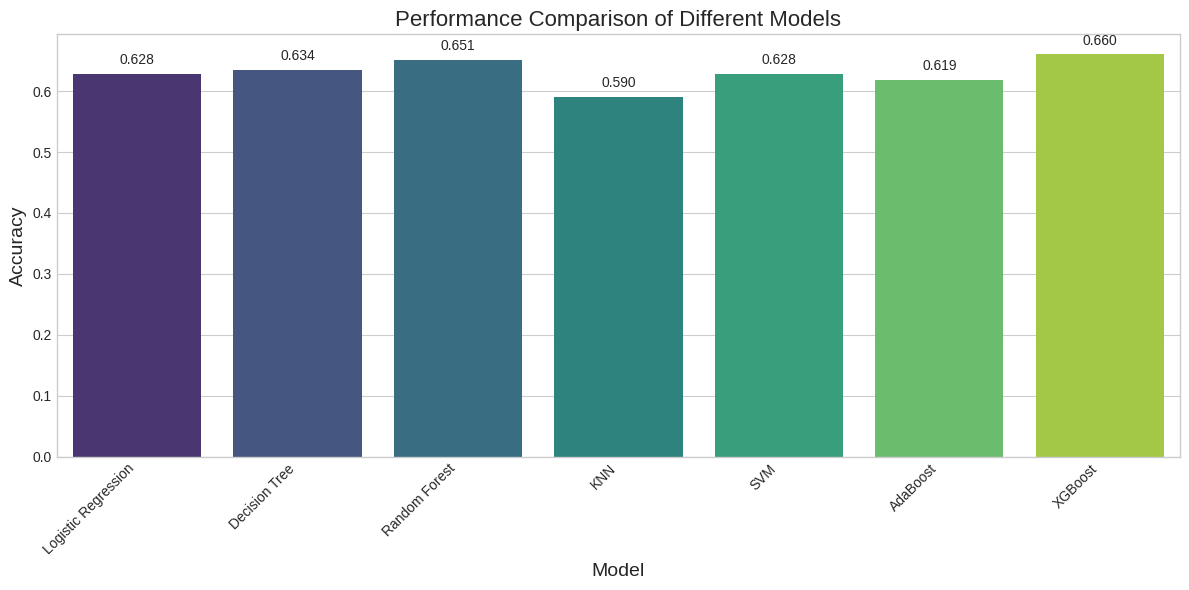

In [85]:
# performance evaluation and comparison between each model

import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame for model performance comparison
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'AdaBoost', 'XGBoost'],
    'Accuracy': [accuracy_score_lg, accuracy_score_dt, accuracy_score_rf, accuracy_score_knn, accuracy_score_svm, accuracy_score_ada, accuracy_score_xgb]
})

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='viridis')

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Performance Comparison of Different Models', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



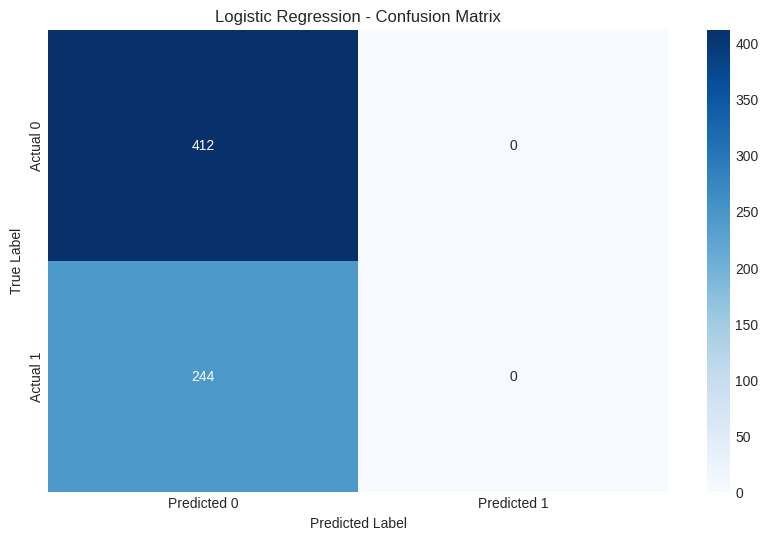

Logistic Regression Metrics:
  Precision: 0.000
  Recall: 0.000
  F1-Score: 0.000
  Accuracy: 0.628


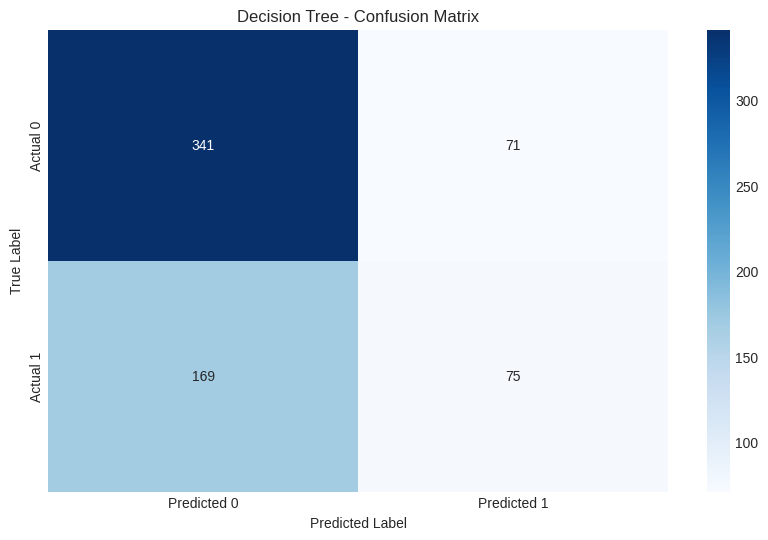

Decision Tree Metrics:
  Precision: 0.514
  Recall: 0.307
  F1-Score: 0.385
  Accuracy: 0.634


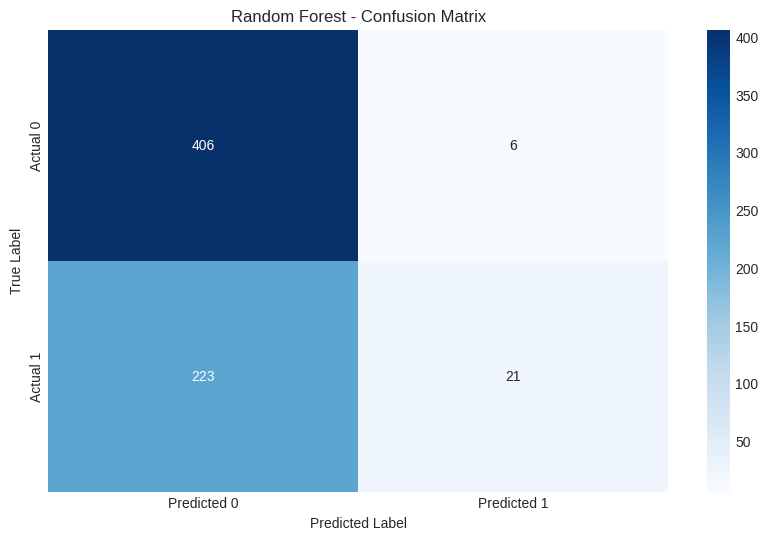

Random Forest Metrics:
  Precision: 0.778
  Recall: 0.086
  F1-Score: 0.155
  Accuracy: 0.651


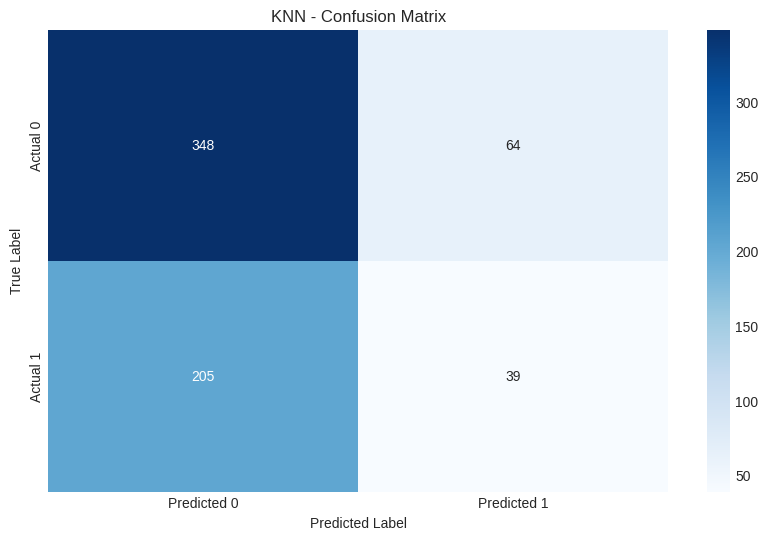

KNN Metrics:
  Precision: 0.379
  Recall: 0.160
  F1-Score: 0.225
  Accuracy: 0.590


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



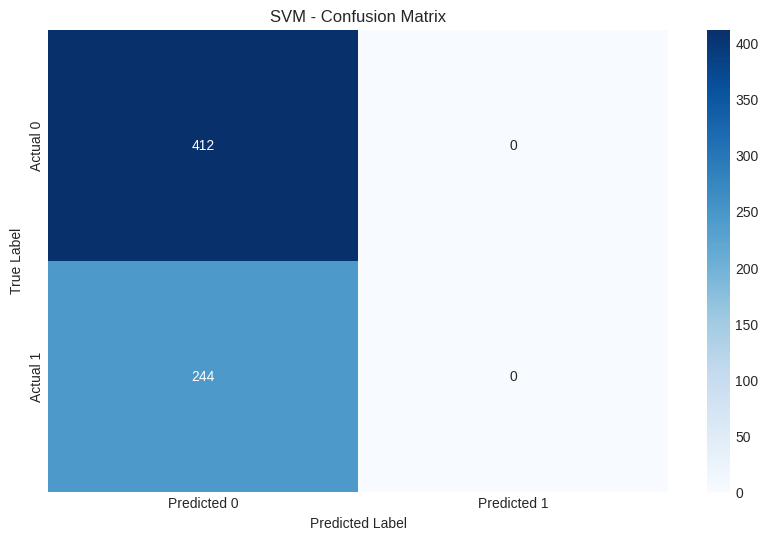

SVM Metrics:
  Precision: 0.000
  Recall: 0.000
  F1-Score: 0.000
  Accuracy: 0.628


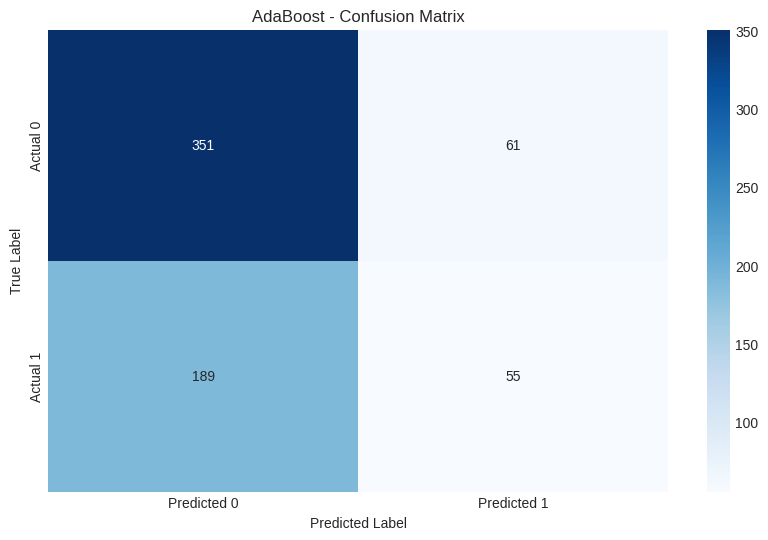

AdaBoost Metrics:
  Precision: 0.474
  Recall: 0.225
  F1-Score: 0.306
  Accuracy: 0.619


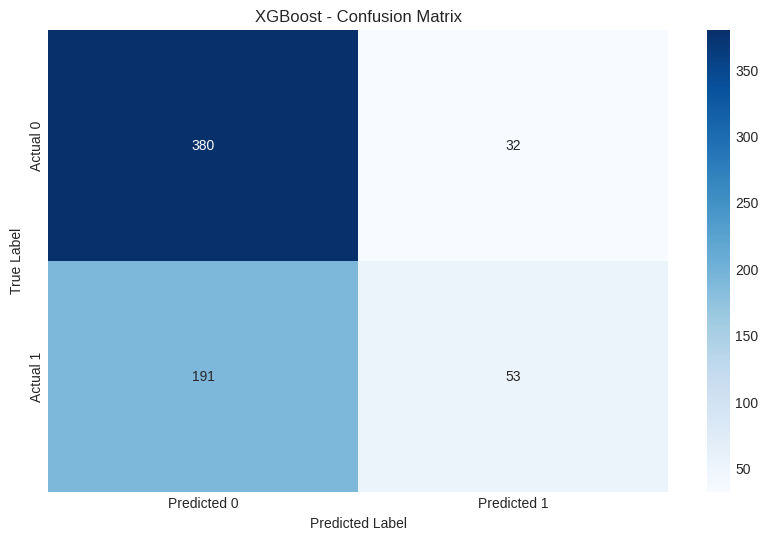

XGBoost Metrics:
  Precision: 0.624
  Recall: 0.217
  F1-Score: 0.322
  Accuracy: 0.660


In [88]:
# prompt: generate confusion matrix for each model - precision, accuracy, f1 score, recall , presen graphically within a single graph

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_and_plot(model, x_test, y_test, model_name):
  y_pred = model.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  plt.figure(figsize=(10, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
  plt.title(f'{model_name} - Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  print(f'{model_name} Metrics:')
  print(f'  Precision: {precision:.3f}')
  print(f'  Recall: {recall:.3f}')
  print(f'  F1-Score: {f1:.3f}')
  print(f'  Accuracy: {accuracy:.3f}')

# Evaluate and plot for each model
evaluate_model_and_plot(model_lr, x_test, y_test, "Logistic Regression")
evaluate_model_and_plot(model_dt, x_test, y_test, "Decision Tree")
evaluate_model_and_plot(model_rf, x_test, y_test, "Random Forest")
evaluate_model_and_plot(model_knn, x_test, y_test, "KNN")
evaluate_model_and_plot(model_svm, x_test, y_test, "SVM")
evaluate_model_and_plot(model_ada, x_test, y_test, "AdaBoost")
evaluate_model_and_plot(model_xgb, x_test, y_test, "XGBoost")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



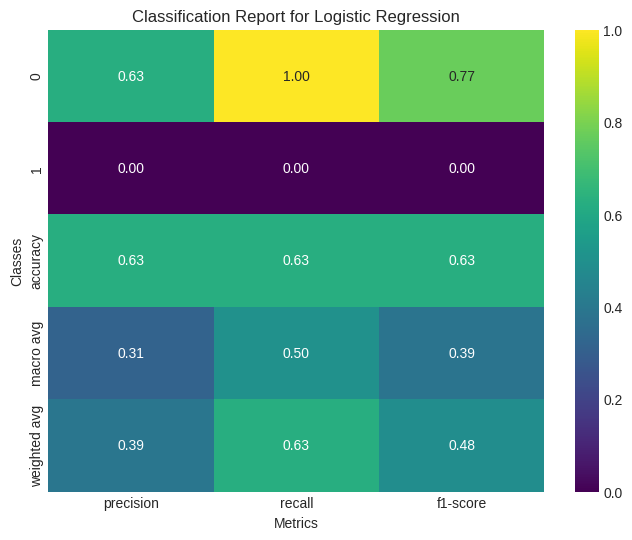

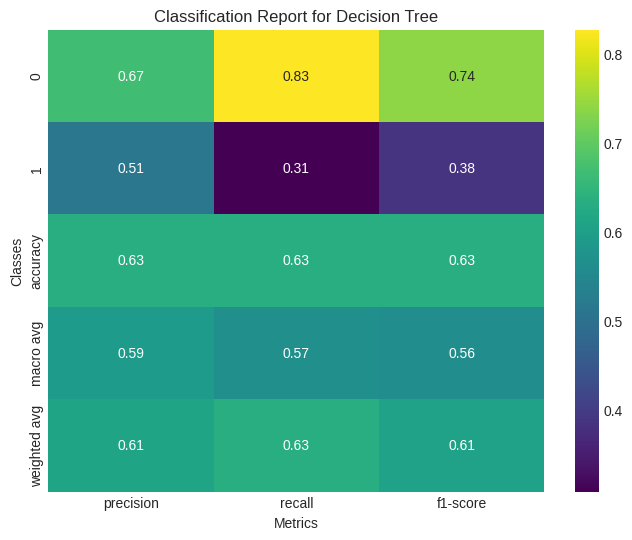

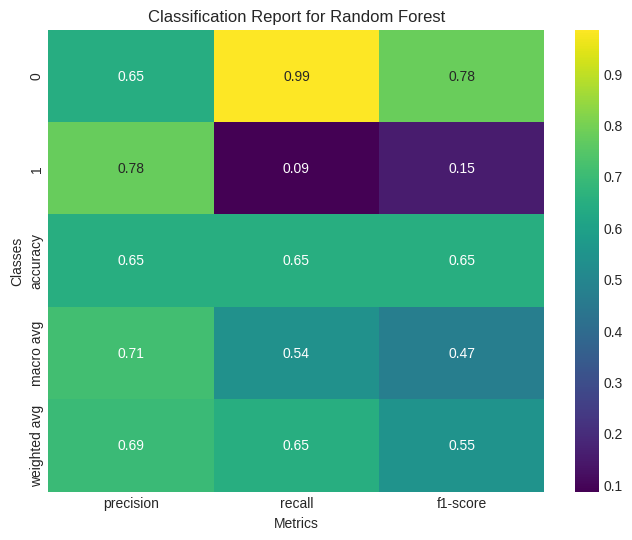

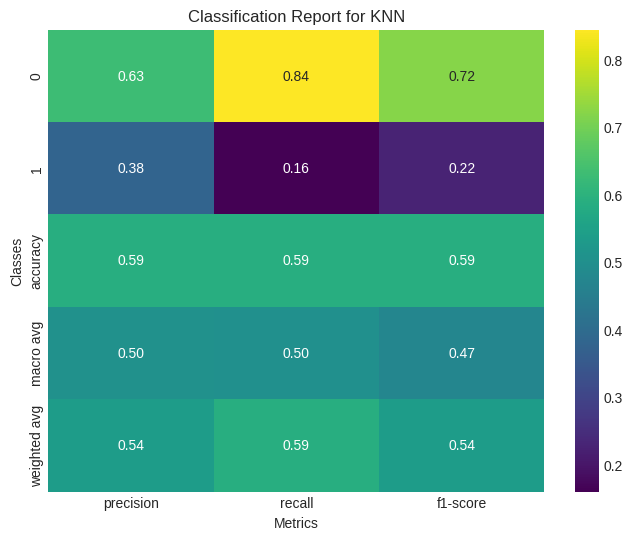

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



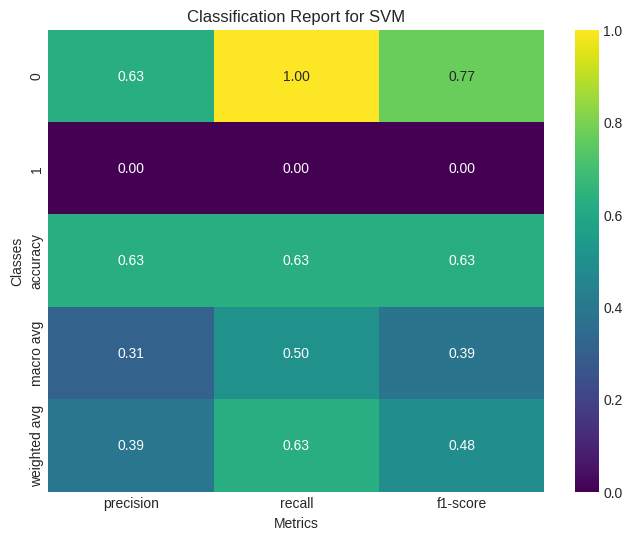

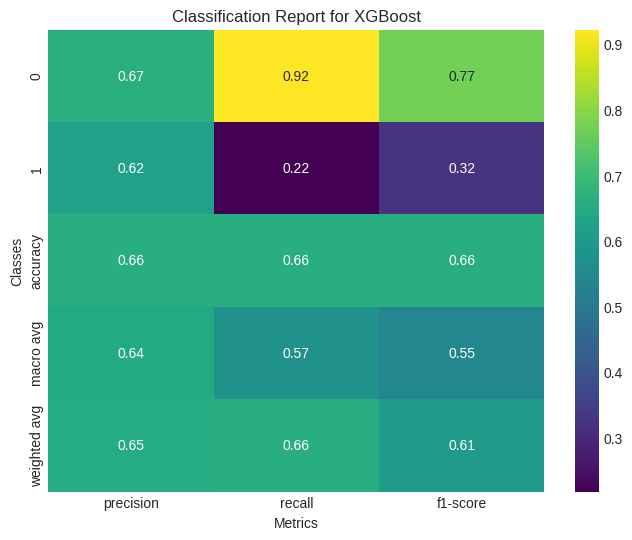

In [96]:
# classification report for each model graphical

import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def plot_classification_report(y_true, y_pred, model_name):
  """Plots a classification report graphically."""

  report = classification_report(y_true, y_pred, output_dict=True)
  df_report = pd.DataFrame(report).transpose()

  plt.figure(figsize=(8, 6))
  sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="viridis")
  plt.title(f"Classification Report for {model_name}")
  plt.xlabel("Metrics")
  plt.ylabel("Classes")
  plt.show()

# Plot classification report for each model
plot_classification_report(y_test, pred_lr, "Logistic Regression")
plot_classification_report(y_test, pred_dt, "Decision Tree")
plot_classification_report(y_test, pred_rf, "Random Forest")
plot_classification_report(y_test, pred_knn, "KNN")
plot_classification_report(y_test, pred_svm, "SVM")
plot_classification_report(y_test, pred_ada, "AdaBoost")
plot_classification_report(y_test, pred_xgb, "XGBoost")
